## Landsat Development

## Sat Utils

- https://github.com/sat-utils/sat-stac
- https://github.com/sat-utils/sat-search
- https://github.com/sat-utils/sat-search/blob/master/tutorial-1.ipynb
- https://github.com/sat-utils/sat-stac/blob/master/tutorial-1.ipynb
- https://github.com/sat-utils/sat-stac/blob/master/tutorial-2.ipynb

In [33]:
from satsearch import Search

# if you want to specify collection
query = {
#     "collection": {
#         "eq": "landsat-8-l1"
#     }
}
search = Search(bbox=[-110, 39.5, -105, 40.5],
                time='2020-02-12T00:00:00Z/2020-03-18T12:31:12Z',
                query=query)

print('%s items' % search.found())

241 items


In [34]:
items = search.items()
print('%s items' % len(items))
print('%s collections' % len(items._collections))
print(items._collections)

241 items
2 collections
[sentinel-2-l1c, landsat-8-l1]


## PODPAC

In [1]:
from podpac.datalib.satutils import SatUtils
import podpac

In [2]:
lat = [38, 38.5, 40]         # lat dimension
lon = [-110, -110.5, -111]  # lon dimension
time = ['2020-02-05', '2020-02-06']

# Create PODPAC coordinates
c = podpac.Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])

In [3]:
# search
node = SatUtils(collection="landsat-8-l1", asset="B3")
s = node.search(c)

In [4]:
src = node.sources
src

[<SatUtilsSource(source='https://landsat-pds.s3.amazonaws.com/c1/L8/038/032/LC08_L1TP_038032_20200205_20200211_01_T1/LC08_L1TP_038032_20200205_20200211_01_T1_B3.TIF', interpolation='nearest')>]

In [5]:
# INTERNAL SEARCH CONVIENCE METHODS

# items
# items = node._search.items()

# summary
# print(items.summary())

# save to json
# node.items.save("test.json")

# item
# item = items[0]

# datetime
# item.datetime

# properties
# item.properties 

# assets to download
# item.assets

# date of item
# item.properties["datetime"]

In [6]:
output = node.eval(c)
output

INFO:podpac.core.data.file_source:Downloading: https://landsat-pds.s3.amazonaws.com/c1/L8/038/032/LC08_L1TP_038032_20200205_20200211_01_T1/LC08_L1TP_038032_20200205_20200211_01_T1_B3.TIF


<xarray.UnitsDataArray (lat: 3, lon: 3, time: 2)>
array([[[   nan,    nan],
        [   nan,    nan],
        [   nan,    nan]],

       [[   nan,    nan],
        [   nan,    nan],
        [   nan,    nan]],

       [[   nan,    nan],
        [   nan,    nan],
        [20323., 20323.]]])
Coordinates:
  * lat      (lat) float64 38.0 38.5 40.0
  * lon      (lon) float64 -110.0 -110.5 -111.0
  * time     (time) datetime64[ns] 2020-02-05 2020-02-06
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x7fd300435ad0>
    crs:          EPSG:4326

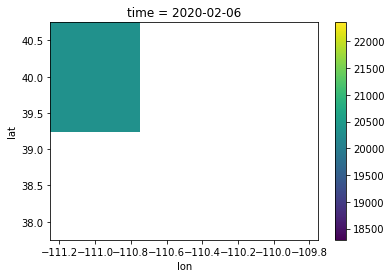

In [31]:
output[:,:,1].plot()

## Landsat

In [1]:
import podpac
from podpac.datalib.satutils import Landsat8

In [2]:
lat = [38, 38.5, 40]         # lat dimension
lon = [-110, -110.5, -111]  # lon dimension
time = ['2020-02-05', '2020-02-06']

# Create PODPAC coordinates
c = podpac.Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])

In [3]:
node = Landsat8(asset="B1")

In [4]:
output = node.eval(c)
output

INFO:podpac.core.data.file_source:Loading AWS resource: s3://landsat-pds/c1/L8/038/032/LC08_L1TP_038032_20200205_20200211_01_T1/LC08_L1TP_038032_20200205_20200211_01_T1_B1.TIF


<xarray.UnitsDataArray (lat: 3, lon: 3, time: 2)>
array([[[   nan,    nan],
        [   nan,    nan],
        [   nan,    nan]],

       [[   nan,    nan],
        [   nan,    nan],
        [   nan,    nan]],

       [[   nan,    nan],
        [   nan,    nan],
        [22060., 22060.]]])
Coordinates:
  * lat      (lat) float64 38.0 38.5 40.0
  * lon      (lon) float64 -110.0 -110.5 -111.0
  * time     (time) datetime64[ns] 2020-02-05 2020-02-06
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x7f8e40c181d0>
    crs:          EPSG:4326

## Sentinel 2

In [1]:
import podpac
from podpac.datalib.satutils import Sentinel2

In [2]:
lat = [38, 38.5, 40]         # lat dimension
lon = [-110, -110.5, -111]  # lon dimension
time = ['2020-02-24', '2020-02-27']

# Create PODPAC coordinates
c = podpac.Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])

In [3]:
node = Sentinel2()

In [4]:
# find assets
_ = node.search(c)
node.list_assets()

['thumbnail',
 'info',
 'metadata',
 'tki',
 'B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B10',
 'B11',
 'B12']

In [3]:
# get true color image
node = Sentinel2(asset="B02")
output = node.eval(c)
output

INFO:podpac.core.data.file_source:Loading AWS resource: s3://sentinel-s2-l1c/tiles/12/S/WH/2020/2/24/0/B02.jp2
INFO:podpac.core.data.file_source:Loading AWS resource: s3://sentinel-s2-l1c/tiles/12/S/WJ/2020/2/24/0/B02.jp2
/Users/marcus/computing/creare/podpac/podpac/podpac/core/cache/ram_cache_store.py:89: UserWarning: Warning: Process is using more RAM than the specified limit in settings.RAM_CACHE_MAX_BYTES. No longer caching. Consider increasing this limit or try clearing the cache (e.g. podpac.utils.clear_cache(mode='RAM') to clear ALL cached results in RAM)
  UserWarning,
INFO:podpac.core.data.file_source:Loading AWS resource: s3://sentinel-s2-l1c/tiles/12/T/WK/2020/2/24/0/B02.jp2
/Users/marcus/computing/creare/podpac/podpac/podpac/core/cache/ram_cache_store.py:89: UserWarning: Warning: Process is using more RAM than the specified limit in settings.RAM_CACHE_MAX_BYTES. No longer caching. Consider increasing this limit or try clearing the cache (e.g. podpac.utils.clear_cache(mode='

<xarray.UnitsDataArray (lat: 3, lon: 3, time: 2)>
array([[[    0.,     0.],
        [    0.,     0.],
        [    0.,     0.]],

       [[    0.,     0.],
        [    0.,     0.],
        [    0.,     0.]],

       [[55860., 55860.],
        [42333., 42333.],
        [56664., 56664.]]])
Coordinates:
  * lat      (lat) float64 38.0 38.5 40.0
  * lon      (lon) float64 -110.0 -110.5 -111.0
  * time     (time) datetime64[ns] 2020-02-24 2020-02-27
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x7fe71241ed10>
    crs:          EPSG:4326